In [1]:
import json
import os
import nltk
from nltk import sent_tokenize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Emotional Analysis

## Using a transformers model to analyse the sentiment of the most influential sentences per paragraph

We will be assessing sentiment relating to:

- Anger
- Fear
- Joy
- Love
- Sadness
- Surprise

I chose the following model, due to it's training, size, popularity and versatility: https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion

# Reading model predictions and inputting to a dataframe

In [2]:
# Reading model prediction outputs

pwd = !pwd
path1 = pwd[0] + '/../data/chapter_predictions.json'
with open(path1, 'r') as json_file:
    chapter_predictions = json.load(json_file)

In [3]:
# Creating dataframe from the mdoel predictions, which involved unpacking nested prediction lists

chapter_totals = []
sentiment_dataframe = pd.DataFrame(columns = ['chapter_number','sentence','anger','fear','joy','love','sadness','surprise'])

for chapter_number in range(12):
    
    for sentence in chapter_predictions[chapter_number]:
        
        predictions = sentence[2][0]
        full_pred = {}
        
        for emotion in predictions:
            full_pred[emotion['label']] = emotion['score']
            
        full_pred['sentence'] = sentence[1]
        full_pred['chapter_number'] = chapter_number + 1
        new_row = pd.DataFrame([full_pred])
    
        sentiment_dataframe = pd.concat([sentiment_dataframe, new_row], ignore_index=True)   

In [4]:
# Averaging sentiment per chapter based

chap_group_sentiment_tfidf = sentiment_dataframe.groupby(by = 'chapter_number').mean()
chap_group_sentiment_tfidf

,anger,fear,joy,love,sadness,surprise
chapter_number,,,,,,
1,0.135125,0.266070,0.379951,0.006579,0.130144,0.082131
2,0.272143,0.229759,0.272379,0.076570,0.082403,0.066745
3,0.399585,0.097307,0.399647,0.004829,0.094648,0.003984
4,0.327128,0.217667,0.295571,0.030598,0.122509,0.006527
5,0.419210,0.300789,0.170558,0.018877,0.062211,0.028357
6,0.456120,0.195335,0.237759,0.003140,0.067602,0.040044
7,0.508855,0.163826,0.206088,0.031224,0.073503,0.016504
8,0.530483,0.211250,0.150555,0.003464,0.042889,0.061359
9,0.469053,0.130776,0.249894,0.018030,0.111023,0.021223


# Visualising average sentiment through the chapters

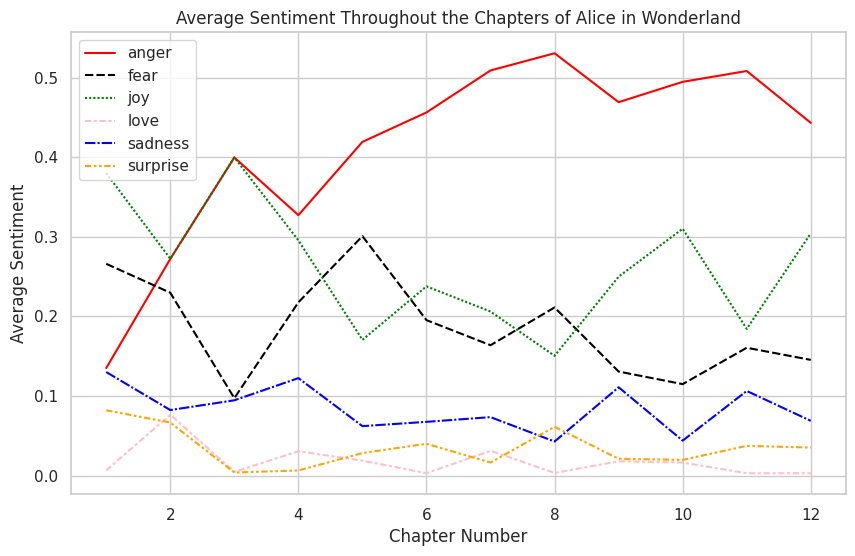

In [5]:
colour_dict = {'anger':'red','fear':'black','joy':'green','love':'pink','sadness':'blue','surprise':'orange'}

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

legend = True
for column_name, series in chap_group_sentiment_tfidf.iteritems():
    
    sns.lineplot(data=chap_group_sentiment_tfidf, ax=ax, palette = colour_dict, legend = legend)
    legend = False
    break

ax.set_title('Average Sentiment Throughout the Chapters of Alice in Wonderland')
ax.set_xlabel('Chapter Number')
ax.set_ylabel('Average Sentiment')
plt.show()

We can make the following observations:
- Anger grows throughout the chapters, then tempers off towards the end. From the quick exploration of sentences below, it can be assumed that 'anger' can be highly correlated with words such as 'offended', 'irritated' and 'mad'. This can therefore be a measure of the 'conflict' that Alice encounters through the story - something small at the start and reaching a crescendo during chapter 8 (upon entry to the garden). There is a clear issue with the model defining 'mad' as an angry term.
- Joy starts high (pre-Wonderland, as expected), then tapers off in the middle chapters as Alice is bewildered by her encounters. This hits an all time low at Chapter 8 (again, with the garden) and then rises again in 9 and 10 as she has her most positive interactions in Wonderland - with the Gryphon and Mock Turtle - and starts to become more self-aware.
- Fear seems to fade throughout the book which can be interpreted as Alice gaining more confidence with the absurdity she faces as time passes.
- Due to the nature of the terms that have been filtered (via TFIDF), it should be noted that many of the sentences analysed are specifically focused on chapter-defining characters. This was unintentional but could be explored further by using Named Entity Recognition or filtering by dialogue for further modelling.


# Exploring the model results by checking top values for each sentiment

In [6]:
# Printing the top 5 statements for each 

for emotion in sentiment_dataframe.columns[2:]:
    top_emotion = sentiment_dataframe.nlargest(5, columns = emotion)
    print(f'\033[1mThe following are the top 5 highest flagged sentences for {emotion}:\033[0m')
    for sentence in top_emotion['sentence']:
        print(' ')
        print(sentence)
        print(' ')
        

The following are the top 5 highest flagged sentences for anger:
 
Alice felt a little irritated at the Caterpillar’s making such _very_ short remarks, and she drew herself up and said, very gravely, “I think, you ought to tell me who _you_ are, first.”  “Why?” said the Caterpillar.
 
 
And she thought of herself, “I wish the creatures wouldn’t be so easily offended!”  “You’ll get used to it in time,” said the Caterpillar; and it put the hookah into its mouth and began smoking again.
 
 
“Oh, you can’t help that,” said the Cat: “we’re all mad here.
 
 
You’re mad.”  “How do you know I’m mad?” said Alice.
 
 
Visit either you like: they’re both mad.”  “But I don’t want to go among mad people,” Alice remarked.
 
The following are the top 5 highest flagged sentences for fear:
 
First, however, she waited for a few minutes to see if she was going to shrink any further: she felt a little nervous about this; “for it might end, you know,” said Alice to herself, “in my going out altogether, li